# PyMC coding

In [83]:
from itertools import accumulate
import re
import time

from IPython.display import Code, HTML, clear_output
from pygments.formatters import HtmlFormatter


code = '''
def F(x):
    return .5 * (pt.erf(x / np.sqrt(2)) + 1)

with pm.Model() as model:
    θ_max = pt.arcsin((R-r) / x)
    σ = pm.Gamma('σ', mu=3, sigma=1)
    p = pm.Deterministic('p', 1 - 2*F(-θ_max / σ))
    y_hat = pm.Binomial('y_hat', n=n, p=p, observed=y)
'''


def f():
    formatter = HtmlFormatter()
    chunks = re.split('(\W)', code)
    for chunk in accumulate(chunks):
        clear_output(wait=True)
        display(Code(chunk, language='python'))    
        time.sleep(.07)

def F(x):
    return .5 * (pt.erf(x / np.sqrt(2)) + 1)

with pm.Model() as model:
    θ_max = pt.arcsin((R-r) / x)
    σ = pm.Gamma('σ', mu=3, sigma=1)
    p = pm.Deterministic('p', 1 - 2*F(-θ_max / σ))
    y_hat = pm.Binomial('y_hat', n=n, p=p, observed=y)

# Misc

NameError: name 'ax0' is not defined

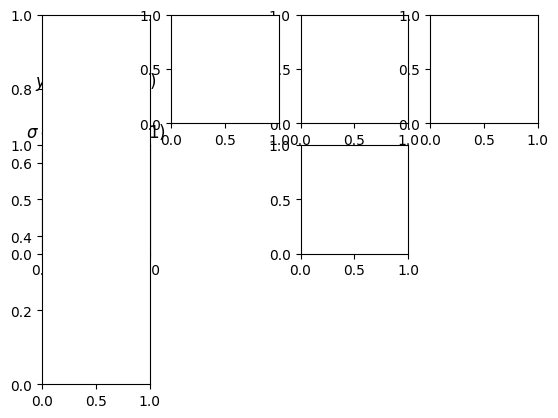

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np
import scipy.stats as ss

fig, axs = plt.subplots(1, 3, figsize=(8, 4))


for ax in ax1, ax2, ax3:
    circle = plt.Circle((0, 0), 1., alpha=.5)
    ax.add_patch(circle)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)

for i, ax in zip([1, -1], [ax1, ax2]):
    con = ConnectionPatch(
        xyA=(i * np.sqrt(2) / 2, -np.sqrt(2) / 2), coordsA=ax.transData,
        xyB=(i * -np.sqrt(2) / 2, np.sqrt(2) / 2), coordsB=ax3.transData,
        arrowstyle="->", shrinkB=5)
    fig.add_artist(con)

for ax in axs:
    ax.set_axis_off()

# Perpay

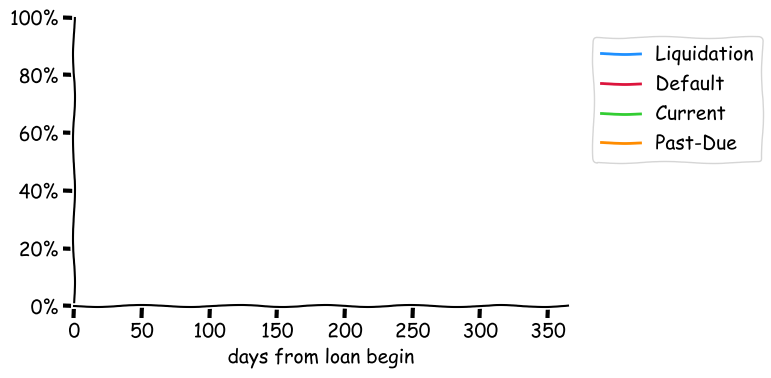

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import minmax_scale


t = np.arange(120) + 30
default_rate = .088  # https://getjerry.com/auto-news/subprime-car-loans-are-seeing-wave-of-defaults
default_rate_t = default_rate * minmax_scale(t)

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(8, 4))
    fig.patch.set_facecolor((0, 0, 0, 0))
    ax.plot([], [], color=np.array([30, 144, 255]) / 255, label='Liquidation')
    ax.plot([], [], color=np.array([220, 20, 60]) / 255, label='Default')
    ax.plot([], [], color=np.array([50, 205, 50]) / 255, label='Current')
    ax.plot([], [], color=np.array([255, 140, 0]) / 255, label='Past-Due')

    ax.set_xlabel('days from loan begin')
    ax.set_xlim([0, 365])
    ax.set_ylim([0, 1])
    ax.yaxis.set_major_formatter('{x:.0%}')
    ax.legend(loc=(1.05, .5))
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    
    fig.tight_layout()
    fig.savefig('assets/workspace.png')

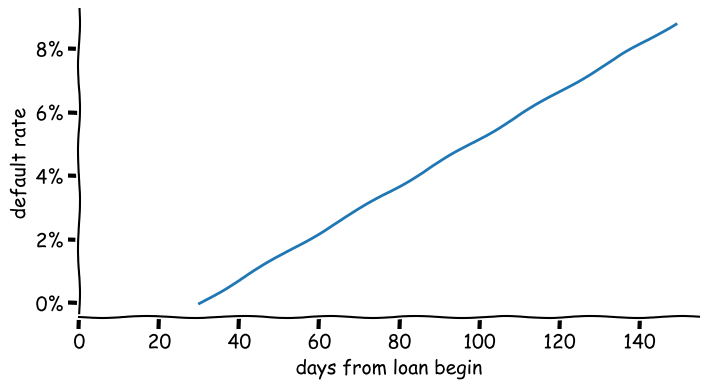

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import minmax_scale


t = np.arange(120) + 30
default_rate = .088  # https://getjerry.com/auto-news/subprime-car-loans-are-seeing-wave-of-defaults
default_rate_t = default_rate * minmax_scale(t)

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(t, default_rate_t)

    ax.set_xlabel('days from loan begin')
    ax.set_ylabel('default rate')
    ax.set_xlim([0, None])
    ax.yaxis.set_major_formatter('{x:.0%}')
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

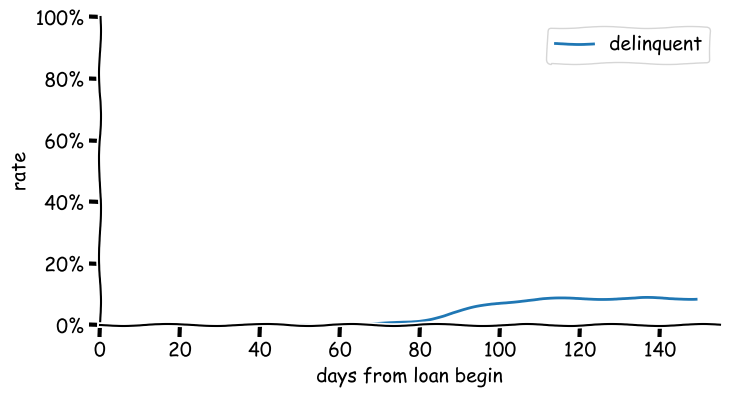

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sp


t = np.arange(120) + 30
default_rate = .088  # https://getjerry.com/auto-news/subprime-car-loans-are-seeing-wave-of-defaults
default_rate_t = default_rate * sp.expit(minmax_scale(t, feature_range=(sp.logit(0.0001), sp.logit(.9999))))

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(t, default_rate_t, label='delinquent')

    ax.set_xlabel('days from loan begin')
    ax.set_ylabel('rate')
    ax.legend()
    ax.set_xlim([0, None])
    ax.set_ylim([0, 1])
    ax.yaxis.set_major_formatter('{x:.0%}')
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

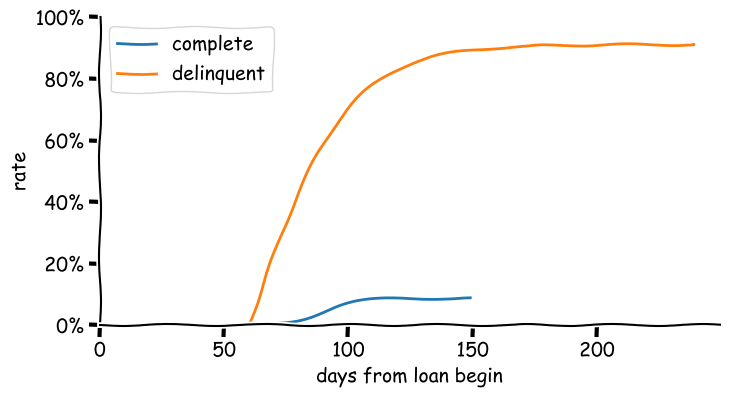

In [4]:
import matplotlib.pyplot as plt
import numpy as np


t1 = np.arange(120) + 30
t2 = np.arange(180) + 60
default_rate = .088  # https://getjerry.com/auto-news/subprime-car-loans-are-seeing-wave-of-defaults
default_rate_t = default_rate * sp.expit(minmax_scale(t1, feature_range=(sp.logit(0.0001), sp.logit(.9999))))
completion_rate_t = minmax_scale(
    (1 - default_rate) * sp.expit(minmax_scale(t2, feature_range=(sp.logit(0.5), sp.logit(.9999)))),
    (0, 1 - default_rate)
)

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(t1, default_rate_t, label='complete')
    ax.plot(t2, completion_rate_t, label='delinquent')

    ax.set_xlabel('days from loan begin')
    ax.set_ylabel('rate')
    ax.legend()
    ax.set_xlim([0, None])
    ax.set_ylim([0, 1])
    ax.yaxis.set_major_formatter('{x:.0%}')
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

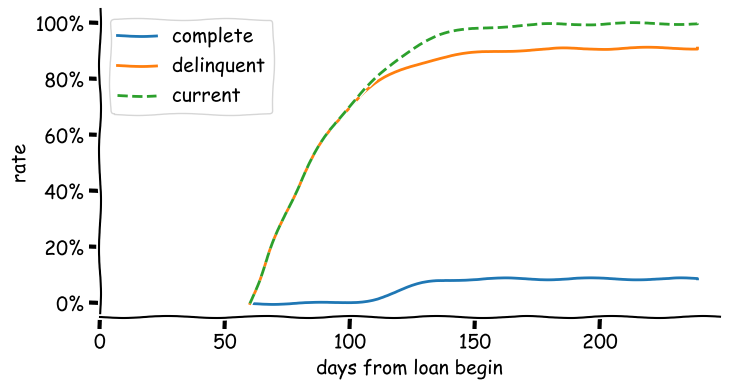

In [5]:
import matplotlib.pyplot as plt
import numpy as np


t1 = np.arange(120) + 30
t2 = np.arange(180) + 60
default_rate = .088  # https://getjerry.com/auto-news/subprime-car-loans-are-seeing-wave-of-defaults
default_rate_t = default_rate * sp.expit(minmax_scale(t1, feature_range=(sp.logit(0.0001), sp.logit(.9999))))
default_rate_t = np.pad(
    default_rate_t,
    ((0, len(t2) - len(t1)),),
    mode='edge',
)
completion_rate_t = minmax_scale(
    (1 - default_rate) * sp.expit(minmax_scale(t2, feature_range=(sp.logit(0.5), sp.logit(.9999)))),
    (0, 1 - default_rate)
)
current_rate_t = minmax_scale(
    default_rate_t
    + completion_rate_t
)

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(t2, default_rate_t, label='complete')
    ax.plot(t2, completion_rate_t, label='delinquent')
    ax.plot(t2, current_rate_t, label='current', ls='--')

    ax.set_xlabel('days from loan begin')
    ax.set_ylabel('rate')
    ax.legend()
    ax.set_xlim([0, None])
    ax.yaxis.set_major_formatter('{x:.0%}')
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

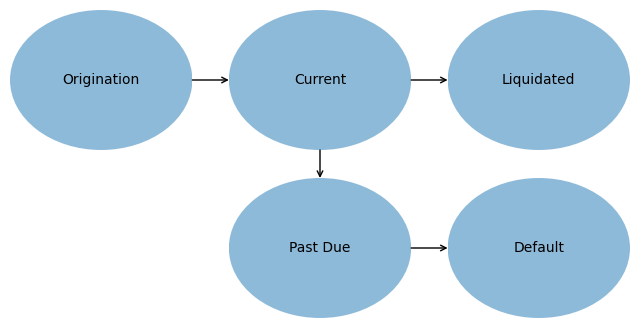

In [83]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np
import scipy.stats as ss


fig = plt.figure(figsize=(8, 4))


ax_origination = fig.add_subplot(2, 3, 1)

ax_current = fig.add_subplot(2, 3, 2)
ax_past_due = fig.add_subplot(2, 3, 5)

ax_liquidated = fig.add_subplot(2, 3, 3)
ax_default = fig.add_subplot(2, 3, 6)


axs = [
    (ax_origination, 'Origination'),
    (ax_current, 'Current'),
    (ax_past_due, 'Past Due'),
    (ax_liquidated, 'Liquidated'),
    (ax_default, 'Default'),
]

connections = [
    (ax_origination, ax_current, (1, 0)),
    (ax_current, ax_past_due, (0, -1)),
    # (ax_past_due, ax_current, (0, 1)),
    (ax_current, ax_liquidated, (1, 0)),
    (ax_past_due, ax_default, (1, 0)),
    # (ax_past_due, ax_liquidated, [np.sqrt(2) / 2] * 2),
]


for ax, t in axs:
    ax.annotate(t, (0, 0), ha='center', va='center')

for ax, _ in axs:
    circle = plt.Circle((0, 0), 1., alpha=.5)
    ax.add_patch(circle)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)

for ax1, ax2, coords in connections:
    con = ConnectionPatch(
        xyA=coords, coordsA=ax1.transData,
        xyB=-1 * np.array(coords), coordsB=ax2.transData,
        arrowstyle="->")
    fig.add_artist(con)

for ax, _ in axs:
    ax.set_axis_off()

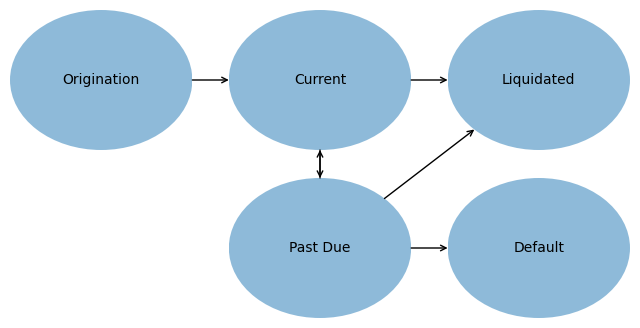

In [75]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np
import scipy.stats as ss


fig = plt.figure(figsize=(8, 4))


ax_origination = fig.add_subplot(2, 3, 1)

ax_current = fig.add_subplot(2, 3, 2)
ax_past_due = fig.add_subplot(2, 3, 5)

ax_liquidated = fig.add_subplot(2, 3, 3)
ax_default = fig.add_subplot(2, 3, 6)


axs = [
    (ax_origination, 'Origination'),
    (ax_current, 'Current'),
    (ax_past_due, 'Past Due'),
    (ax_liquidated, 'Liquidated'),
    (ax_default, 'Default'),
]

connections = [
    (ax_origination, ax_current, (1, 0)),
    (ax_current, ax_past_due, (0, -1)),
    (ax_past_due, ax_current, (0, 1)),
    (ax_current, ax_liquidated, (1, 0)),
    (ax_past_due, ax_default, (1, 0)),
    (ax_past_due, ax_liquidated, [np.sqrt(2) / 2] * 2),
]



for ax, t in axs:
    ax.annotate(t, (0, 0), ha='center', va='center')

for ax, _ in axs:
    circle = plt.Circle((0, 0), 1., alpha=.5)
    ax.add_patch(circle)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)

for ax1, ax2, coords in connections:
    con = ConnectionPatch(
        xyA=coords, coordsA=ax1.transData,
        xyB=-1 * np.array(coords), coordsB=ax2.transData,
        arrowstyle="->")
    fig.add_artist(con)

for ax, _ in axs:
    ax.set_axis_off()

# DGP

(array([  3.,   3.,  25.,  81., 343., 400., 121.,  19.,   4.,   1.]),
 array([-12.19027758,  -9.81662183,  -7.44296608,  -5.06931033,
         -2.69565458,  -0.32199884,   2.05165691,   4.42531266,
          6.79896841,   9.17262416,  11.54627991]),
 <BarContainer object of 10 artists>)

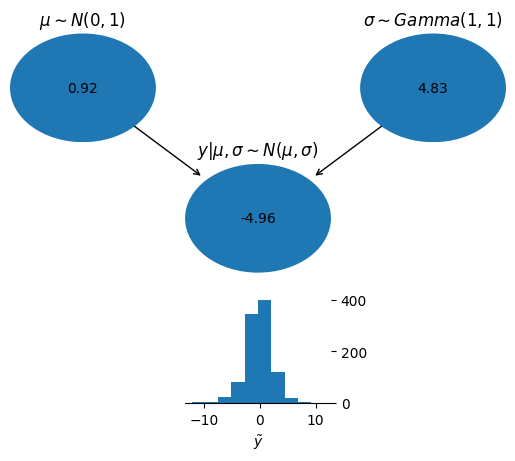

In [6]:
# import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np
import scipy.stats as ss

# fig, axs = plt.subplots(2, 3, figsize=(8, 4))
fig = plt.figure()

ax1 = fig.add_subplot(331)#axs[0, 0]
ax2 = fig.add_subplot(333)
ax3 = fig.add_subplot(335)
axhist = fig.add_subplot(338)
axs = [ax1, ax2, ax3, axhist]

# Random Variables all the way down
N = 1000

μ, σ = [], []
y = []
for i in range(N):
    μi, σi = ss.norm(0, 1).rvs(), ss.gamma(1, 1).rvs()
    yi = ss.norm(μi, σi).rvs()
    μ.append(μi)
    σ.append(σi)
    y.append(yi)

    
ax1.set_title('$\mu\sim N(0,1)$')
ax2.set_title('$\sigma\sim Gamma(1, 1)$')
ax3.set_title('$y| \mu,\sigma\sim N(\mu,\sigma)$')

t1 = ax1.annotate(f'{μi:.2f}', (0, 0), ha='center', va='center')
ax2.annotate(f'{σi:.2f}', (0, 0), ha='center', va='center')
ax3.annotate(f'{yi:.2f}', (0, 0), ha='center', va='center')

for ax in ax1, ax2, ax3:
    circle = plt.Circle((0, 0), 1.)
    ax.add_patch(circle)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)

for i, ax in zip([1, -1], [ax1, ax2]):
    con = ConnectionPatch(
        xyA=(i * np.sqrt(2) / 2, -np.sqrt(2) / 2), coordsA=ax.transData,
        xyB=(i * -np.sqrt(2) / 2, np.sqrt(2) / 2), coordsB=ax3.transData,
        arrowstyle="->", shrinkB=5)
    fig.add_artist(con)

for ax in axs:
    ax.set_axis_off()
axhist.set_axis_on()
axhist.yaxis.tick_right()
axhist.spines.top.set_visible(False)
axhist.spines.right.set_visible(False)
axhist.spines.left.set_visible(False)
axhist.set_xlabel(r'$\tilde{y}$')

axhist.hist(y)

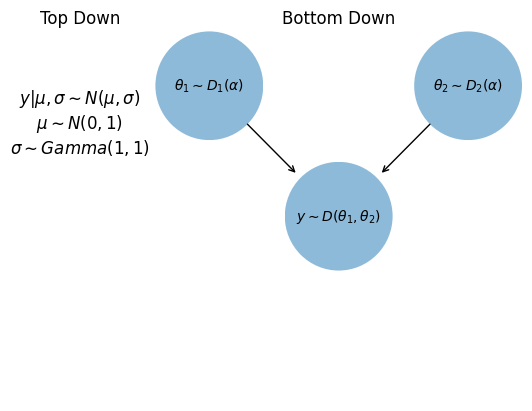

In [17]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np
import scipy.stats as ss

# fig, axs = plt.subplots(2, 3, figsize=(8, 4))
fig = plt.figure()


ax1a = fig.add_subplot(345)
ax1a.set_title(
    '\n'.join([
        '$y| \mu,\sigma\sim N(\mu,\sigma)$',
        '$\mu\sim N(0,1)$',
        '$\sigma\sim Gamma(1, 1)$',
    ])
)

ax0a = fig.add_subplot(141)
ax0b = fig.add_subplot(343)
ax1 = fig.add_subplot(342)
ax2 = fig.add_subplot(344)
ax3 = fig.add_subplot(347)
axs = [ax0a, ax0b, ax1a, ax0, ax1, ax2, ax3]

# Random Variables all the way down
N = 1000

μ, σ = [], []
y = []
for i in range(N):
    μi, σi = ss.norm(0, 1).rvs(), ss.gamma(1, 1).rvs()
    yi = ss.norm(μi, σi).rvs()
    μ.append(μi)
    σ.append(σi)
    y.append(yi)


ax0a.set_title('Top Down')
ax0b.set_title('Bottom Down')

t1 = ax1.annotate(r'$\theta_{1}\sim D_{1}(\alpha)$', (0, 0), ha='center', va='center')
ax2.annotate(r'$\theta_{2}\sim D_{2}(\alpha)$', (0, 0), ha='center', va='center')
ax3.annotate(r'$y\sim D(\theta_{1},\theta_{2})$', (0, 0), ha='center', va='center')

for ax in ax1, ax2, ax3:
    circle = plt.Circle((0, 0), 1., alpha=.5)
    ax.add_patch(circle)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)

for i, ax in zip([1, -1], [ax1, ax2]):
    con = ConnectionPatch(
        xyA=(i * np.sqrt(2) / 2, -np.sqrt(2) / 2), coordsA=ax.transData,
        xyB=(i * -np.sqrt(2) / 2, np.sqrt(2) / 2), coordsB=ax3.transData,
        arrowstyle="->", shrinkB=5)
    fig.add_artist(con)

for ax in axs:
    ax.set_axis_off()

# Golf

In [1]:
import io

import pandas as pd

df = pd.read_csv(
    io.StringIO('x n y\n2 1443 1346\n3 694 577\n4 455 337\n5 353 208\n6 272 149\n7 256 136\n8 240 111\n9 217 69\n10 200 67\n11 237 75\n12 202 52\n13 192 46\n14 174 54\n15 167 28\n16 201 27\n17 195 31\n18 191 33\n19 147 20\n20 152 24'),
    sep=' ')
df['p'] = df.y / df.n
df.head()

,x,n,y,p
0,2,1443,1346,0.932779
1,3,694,577,0.831412
2,4,455,337,0.740659
3,5,353,208,0.589235
4,6,272,149,0.547794


interactive(children=(FloatSlider(value=3.0, description='σ_degrees_mean', max=9.0, min=-3.0), FloatSlider(val…

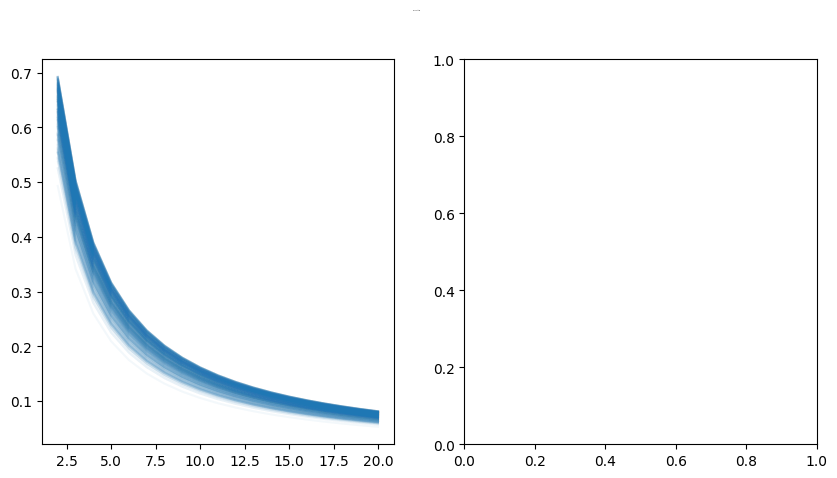

In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss


F = ss.norm.cdf
r = golf_ball_radius = 1.68 / 2  # inches
R = hole_radius = 4.25 / 2       # inches
X = df.x * 12                    # inches


@interact
def d(σ_degrees_mean=3., σ_degrees_sigma=.5):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    fig.suptitle('super title', fontsize=1)

    σ_degrees = ss.truncnorm(loc=σ_degrees_mean, scale=σ_degrees_sigma, a=0, b=100).rvs(300)[:, None]
    σ = σ_degrees * np.pi / 180

    threshold_angle = np.arcsin((R - r) / X)[None, :]
    predictions = 2 * F(threshold_angle / σ) - 1

    axs[0].plot(df.x, predictions.T, color='C0', alpha=.05)
    axs[0].plot([], [], label='Samples', color='C0')

    axs[0].scatter(df.x, df.p, color='k', zorder=10, label='Actual')

    axs[1].hist(σ_degrees)

    ax = axs[0]
    ax.set_ylabel('Probability of Success')
    ax.set_xlabel('Distance From Hole (feet)')
    ax.legend()

    axs[1].set_xlabel('Error of Degree')

In [4]:
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib.patches import Ellipse, Circle


F = ss.norm.cdf
r = golf_ball_radius = 1.68 / 2  # inches
R = hole_radius = 4.25 / 2       # inches
X = df.x * 12                    # inches

R /= 12
r /= 12

s = 2 * 1 / (20 + R + r)

@interact
def d(σ=(0., 5.), x=(0., 20.)):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True, gridspec_kw={'width_ratios':[4,1]})

    ax = axs[0]
    for center, width, height in [((0, 0), r, r * s),
                                  ((x, 0), R, s * R )]:
        # circle = plt.Circle(center, radius)
        circle = Ellipse(center, width, height)
        ax.add_patch(circle)
        
    ax.plot([0, x], [0, 0], color='k')
    ax.plot([0, x], [0, R-r], color='C7')
    ax.plot([x, 20 + R], [R-r, R-r], ls='--', color='C7')
    ax.plot([0, x], [0, -(R-r)], color='C7')
    ax.plot([x, 20 + R], [-R+r, -R+r], ls='--', color='C7')

    threshold_angle = np.arcsin((R-r) / (x)) * 180 / np.pi
    # ax.plot([0, 20 + R], [0, np.arctan(threshold_angle * np.pi / 180) * 20], color='C7', ls='--')
    # ax.plot([0, 20 + R], [0, -np.arctan(threshold_angle * np.pi / 180) * 20], color='C7', ls='--')
    ax.plot([0, x], [0, np.arctan(σ * np.pi / 180) * x], color='C0')
    ax.plot([0, x], [0, -np.arctan(σ * np.pi / 180) * x], color='C0')
    ax.plot([x, 20 + R], [np.arctan(σ * np.pi / 180) * x] * 2, color='C0', ls='--')
    ax.plot([x, 20 + R], [-np.arctan(σ * np.pi / 180) * x] * 2, color='C0', ls='--')

    ax.set_xlabel('$x$=Distance to Hole')
    ax.set_xlim([-r, 20 + R])
    ax.set_ylim([-.5, .5])
    ax.set_yticks([])
    ax.spines.left.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.right.set_visible(False)
    
    ax = axs[1]
    
    prob_success = 2 * ss.norm.cdf(np.arcsin((R - r) / (x)) / (σ * np.pi / 180)) - 1
    angle = np.linspace(-3 * σ, 3 * σ, num=300)
    ix1, ix2 = np.argmin(np.abs(angle - (R - r))), np.argmin(np.abs(angle - (-R + r)))
    probs = ss.norm(loc=0, scale=σ).pdf(angle)
    angle_scaled = angle * (R - r) / threshold_angle
    ax.fill_betweenx(angle_scaled, 0, probs, where=((angle > -threshold_angle) & (angle < threshold_angle)))
    ax.plot(probs, angle_scaled)
    ax.axhline(R - r, ls='--', color='C7')
    ax.axhline(-R + r, ls='--', color='C7')

    fig.suptitle(f'Probability Shot\nWithin Threshold: {prob_success:.0%}')

    ax.set_xlabel('PDF of Shot Angle')
    # ax.set_xlim([0, 2])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines.left.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.right.set_visible(False)
    # ax.yaxis.tick_right()
    # ax.set_ylabel('Angle of Shot')

    fig.tight_layout()

interactive(children=(FloatSlider(value=2.5, description='σ', max=5.0), FloatSlider(value=10.0, description='x…

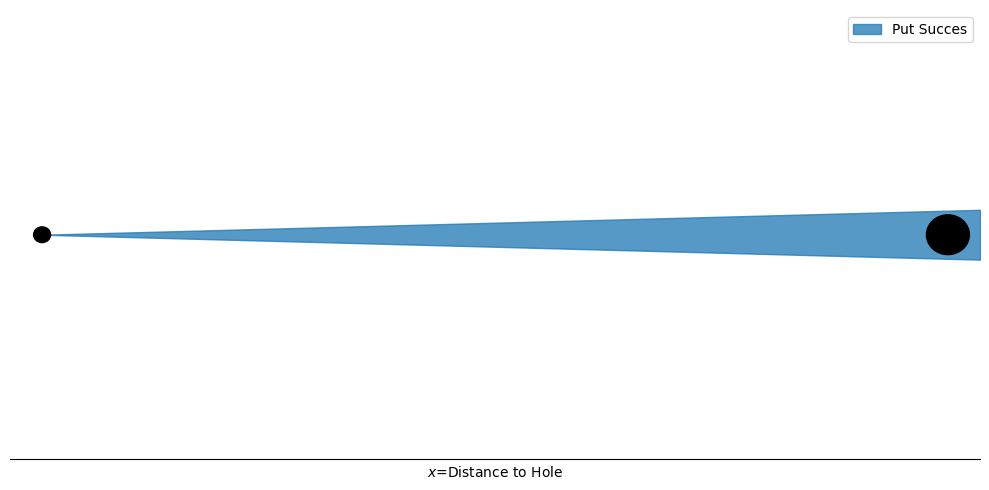

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib.patches import Ellipse, Circle


F = ss.norm.cdf
r = golf_ball_radius = 1.68 / 2  # inches
R = hole_radius = 4.25 / 2       # inches
X = df.x * 12                    # inches

R /= 12
r /= 12



fig, ax = plt.subplots(figsize=(10, 5))


x = 5
xlim1 = -R
xlim2 = x + R
s = 2 * 2 / (xlim2 - xlim1)


for center, width, height in [((0, 0), r / s, r),
                              ((x, 0), R / s, R)]:
    # circle = plt.Circle(center, radius)
    circle = Ellipse(center, width, height, color='k', zorder=10)
    ax.add_patch(circle)


ax.fill_between(
    [0, xlim2],
    [0, -np.arcsin((R - r) / x) * xlim2],
    [0, np.arcsin((R - r) / x) * xlim2],
    color='C0',
    alpha=.75,
    label='Put Succes',
)
# ax.fill_between(
#     [0, xlim2],
#     [0, np.arcsin((R - r) / x) * (xlim2)],
#     [0, np.arcsin(.75 / x) * xlim2],
#     color='C1',
#     alpha=.75,
#     label='Put Miss',
# )
# ax.fill_between(
#     [0, xlim2],
#     [0, -np.arcsin((R - r) / x) * (xlim2)],
#     [0, -np.arcsin(.75 / x) * xlim2],
#     color='C1',
#     alpha=.75
# )

# threshold_angle = np.arcsin((R-r) / (x)) * 180 / np.pi

# np.random.seed(0)
# for σi in ss.norm(0, σ).rvs(100):
#     c = 'C0' if np.abs(σi ) < threshold_angle else 'C1'
#     ax.plot([0, xlim2], [0, np.arctan(σi * np.pi / 180) * (xlim2)], color=c, alpha=.2)
#     ax.plot([0, xlim2], [0, -np.arctan(σi * np.pi / 180) * (xlim2)], color=c, alpha=.2)
# ax.plot([], [], color='C0', label='Put Success')
# ax.plot([], [], color='C1', label='Put Miss')

ax.set_xlabel('$x$=Distance to Hole')
ax.set_xlim([xlim1, xlim2])
ax.set_ylim([-1, 1])
ax.set_xticks([])
ax.set_yticks([])
ax.spines.left.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.legend()

fig.tight_layout()

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib.patches import Ellipse, Circle


F = ss.norm.cdf
r = golf_ball_radius = 1.68 / 2  # inches
R = hole_radius = 4.25 / 2       # inches
X = df.x * 12                    # inches

R /= 12
r /= 12



@interact
def d(σ=(0., 5.), x=(0.5, 20.)):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True, gridspec_kw={'width_ratios':[4,1]})
    
    xlim1 = -R
    xlim2 = x + R
    s = 2 * 2 / (xlim2 - xlim1)

    ax = axs[0]
    for center, width, height in [((0, 0), r / s, r),
                                  ((x, 0), R / s, R)]:
        # circle = plt.Circle(center, radius)
        circle = Ellipse(center, width, height)
        ax.add_patch(circle)
        
    ax.plot([0, x], [0, 0], color='k')
    ax.plot([0, x], [0, R-r], color='C7')
    ax.plot([x, x + R], [R-r, R-r], ls='--', color='C7')
    ax.plot([0, x], [0, -(R-r)], color='C7')
    ax.plot([x, x + R], [-R+r, -R+r], ls='--', color='C7')

    threshold_angle = np.arcsin((R-r) / (x)) * 180 / np.pi
    # ax.plot([0, 20 + R], [0, np.arctan(threshold_angle * np.pi / 180) * 20], color='C7', ls='--')
    # ax.plot([0, 20 + R], [0, -np.arctan(threshold_angle * np.pi / 180) * 20], color='C7', ls='--')
    np.random.seed(0)
    for σi in ss.norm(0, σ).rvs(100):
        c = 'C0' if np.abs(σi ) < threshold_angle else 'C1'
        ax.plot([0, xlim2], [0, np.arctan(σi * np.pi / 180) * (xlim2)], color=c, alpha=.2)
        ax.plot([0, xlim2], [0, -np.arctan(σi * np.pi / 180) * (xlim2)], color=c, alpha=.2)
    ax.plot([], [], color='C0', label='Put Success')
    ax.plot([], [], color='C1', label='Put Miss')

    ax.set_xlabel('$x$=Distance to Hole')
    ax.set_xlim([xlim1, xlim2])
    ax.set_ylim([-1, 1])
    ax.set_yticks([])
    ax.spines.left.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.right.set_visible(False)
    ax.legend(title='Samples From Prior')
    
    ax = axs[1]
    
    prob_success = 2 * ss.norm.cdf(np.arcsin((R - r) / (x)) / (σ * np.pi / 180)) - 1
    angle = np.linspace(-3 * σ, 3 * σ, num=300)
    ix1, ix2 = np.argmin(np.abs(angle - (R - r))), np.argmin(np.abs(angle - (-R + r)))
    probs = ss.norm(loc=0, scale=σ).pdf(angle)
    angle_scaled = angle * (R - r) / threshold_angle
    ax.fill_betweenx(angle_scaled, 0, probs, where=((angle > -threshold_angle) & (angle < threshold_angle)), label='Pr(Put Success)')
    ax.plot(probs, angle_scaled)
    ax.axhline(R - r, ls='--', color='C7')
    ax.axhline(-R + r, ls='--', color='C7')

    fig.suptitle(f'Probability Put Success\nWithin Threshold: {prob_success:.0%}')

    ax.set_xlabel('PDF of Shot Angle')
    # ax.set_xlim([0, 2])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines.left.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.right.set_visible(False)
    # ax.yaxis.tick_right()
    # ax.set_ylabel('Angle of Shot')

    fig.tight_layout()

interactive(children=(FloatSlider(value=2.5, description='σ', max=5.0), FloatSlider(value=10.25, description='…

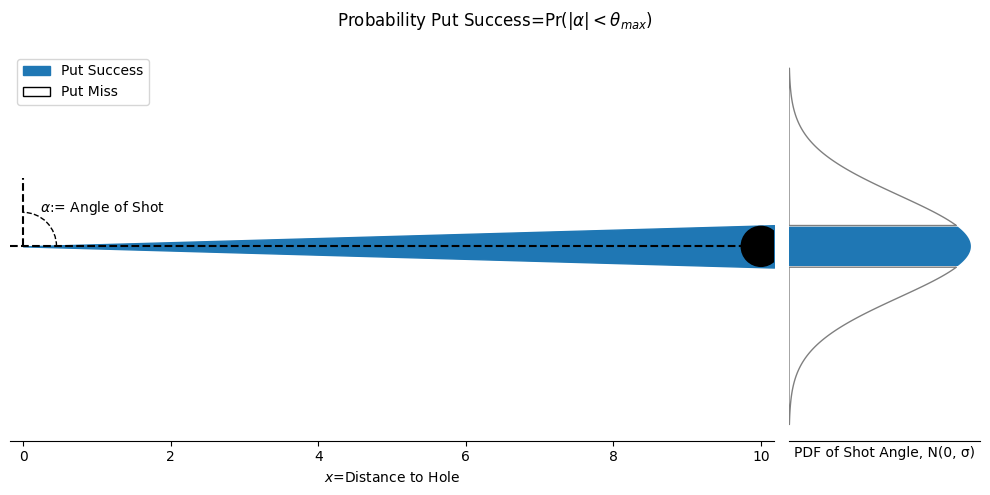

In [8]:
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib.patches import Ellipse, Circle, Arc


fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True, gridspec_kw={'width_ratios':[4,1]})



F = ss.norm.cdf
r = golf_ball_radius = 1.68 / 2  # inches
R = hole_radius = 4.25 / 2       # inches
X = df.x * 12                    # inches

R /= 12
r /= 12


σ = 1.5
x = 10

xlim1 = -R
xlim2 = x + R
s = 2 * 2 / (xlim2 - xlim1)

ax = axs[0]

ax.add_patch(Arc((0, 0), 5 * r/s, 5 * r, theta1=0, theta2=90, edgecolor='k', ls='--'))
ax.axhline(0, ls='--', color='k')
ax.vlines(0, 0, 5 * r, color='k', ls='--')
ax.annotate(r'$\alpha$:= Angle of Shot', (5 * r/s/4, 5 * r/2))

ax.add_patch(Ellipse((x, 0), R / s, R, color='k', lw=5))


threshold_angle = np.arcsin((R-r) / x) * 180 / np.pi
ax.fill_between(
    [0, xlim2],
    [0, np.arctan(-threshold_angle * np.pi / 180) * xlim2],
    [0, np.arctan(threshold_angle * np.pi / 180) * xlim2],
    color='C0',
    label='Put Success',
    zorder=-1
)
# for sign in [1, -1]:
#     ax.fill_between(
#         [0, xlim2],
#         [0, np.arctan(sign * threshold_angle * np.pi / 180) * xlim2],
#         [0, np.arctan(sign * 3.5 * σ * np.pi / 180) * xlim2],
#         color='w',
#         label='Put Miss' if sign == 1 else '',
#         alpha=.5,
#         edgecolor='k',
#         zorder=-1
#     )
ax.fill_between([], [], [], color='w', label='Put Miss', edgecolor='k')

ax.set_xlabel('$x$=Distance to Hole')
ax.set_xlim([xlim1, xlim2])
ax.set_ylim([-1, 1])
ax.set_yticks([])
ax.spines.left.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.legend(loc='upper left')

ax = axs[1]

prob_success = 2 * ss.norm.cdf(np.arcsin((R - r) / (x)) / (σ * np.pi / 180)) - 1
angle = np.linspace(-3.5 * σ, 3.5 * σ, num=300)
ix1, ix2 = np.argmin(np.abs(angle - (R - r))), np.argmin(np.abs(angle - (-R + r)))
probs = ss.norm(loc=0, scale=σ).pdf(angle)
angle_scaled = angle * (R - r) / threshold_angle
ax.fill_betweenx(angle_scaled, 0, probs, where=((angle > -threshold_angle) & (angle < threshold_angle)))
ax.fill_betweenx(angle_scaled, 0, probs, where=((angle < -threshold_angle) | (angle > threshold_angle)), color='w', edgecolor='k', alpha=.5)


fig.suptitle(r'Probability Put Success=Pr$\left(\vert\alpha\vert<\theta_{max}\right)$')

ax.set_xlabel('PDF of Shot Angle, N(0, σ)')
ax.set_xlim([0, None])
ax.set_xticks([])
ax.set_yticks([])
ax.spines.left.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

fig.tight_layout()

In [9]:
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib.patches import Ellipse, Circle
import numpy as np
import scipy.stats as ss


F = ss.norm.cdf
r = golf_ball_radius = 1.68 / 2  # inches
R = hole_radius = 4.25 / 2       # inches
X = df.x * 12                    # inches

R /= 12
r /= 12



@interact
def d(σ=(0., 5.), x=(0.5, 20.)):
    # fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True, gridspec_kw={'width_ratios':[4,1]}, projection='3d')
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    xlim1 = -R
    xlim2 = x + R
    s = 2 * 2 / (xlim2 - xlim1)

    # for center, width, height in [((0, 0), r / s, r),
    #                               ((x, 0), R / s, R)]:
    #     # circle = plt.Circle(center, radius)
    #     circle = Ellipse(center, width, height)
    #     ax.add_patch(circle)
        
    ax.plot([0, x], [0, 0], color='k', zs=0, zdir='z')
    ax.plot([0, x], [0, R-r], color='C7', zs=0, zdir='z')
    ax.plot([x, x + R], [R-r, R-r], ls='--', color='C7', zs=0, zdir='z')
    ax.plot([0, x], [0, -(R-r)], color='C7', zs=0, zdir='z')
    ax.plot([x, x + R], [-R+r, -R+r], ls='--', color='C7', zs=0, zdir='z')

    threshold_angle = np.arcsin((R-r) / (x)) * 180 / np.pi
    # ax.plot([0, 20 + R], [0, np.arctan(threshold_angle * np.pi / 180) * 20], color='C7', ls='--')
    # ax.plot([0, 20 + R], [0, -np.arctan(threshold_angle * np.pi / 180) * 20], color='C7', ls='--')
    np.random.seed(0)
    for σi in ss.norm(0, σ).rvs(100):
        c = 'C0' if np.abs(σi ) < threshold_angle else 'C1'
        ax.plot([0, xlim2], [0, np.arctan(σi * np.pi / 180) * (xlim2)], color=c, alpha=.2, zs=0, zdir='z')
        ax.plot([0, xlim2], [0, -np.arctan(σi * np.pi / 180) * (xlim2)], color=c, alpha=.2, zs=0, zdir='z')
    ax.plot([], [], color='C0', label='Put Success', zs=0, zdir='z')
    ax.plot([], [], color='C1', label='Put Miss', zs=0, zdir='z')

    ax.set_xlabel('$x$=Distance to Hole')
    ax.set_xlim([xlim1, xlim2])
    ax.set_ylim([-1, 1])
    ax.set_yticks([])
    ax.spines.left.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.right.set_visible(False)
    ax.legend()
    
    prob_success = 2 * ss.norm.cdf(np.arcsin((R - r) / (x)) / (σ * np.pi / 180)) - 1
    angle = np.linspace(-3 * σ, 3 * σ, num=300)
    ix1, ix2 = np.argmin(np.abs(angle - (R - r))), np.argmin(np.abs(angle - (-R + r)))
    probs = ss.norm(loc=0, scale=σ).pdf(angle)
    angle_scaled = angle * (R - r) / threshold_angle
    ax.add_collection3d(
        ax.fill_between(angle_scaled, 0, probs, where=((angle > -threshold_angle) & (angle < threshold_angle)), label='Pr(Put Success)'),
        zs=x, zdir='x')
    ax.plot(angle_scaled, probs, zs=x, zdir='x')
    ax.axhline(R - r, ls='--', color='C7')
    ax.axhline(-R + r, ls='--', color='C7')

#     fig.suptitle(f'Probability Put Success\nWithin Threshold: {prob_success:.0%}')

#     ax.set_xlabel('PDF of Shot Angle')
#     # ax.set_xlim([0, 2])
#     ax.set_xticks([])
#     ax.s”et_yticks([])
#     ax.spines.left.set_visible(False)
#     ax.spines.top.set_visible(False)
#     ax.spines.right.set_visible(False)
#     # ax.yaxis.tick_right()
#     # ax.set_ylabel('Angle of Shot')


    ax.view_init(elev=10., azim=-160)



interactive(children=(FloatSlider(value=2.5, description='σ', max=5.0), FloatSlider(value=10.25, description='…

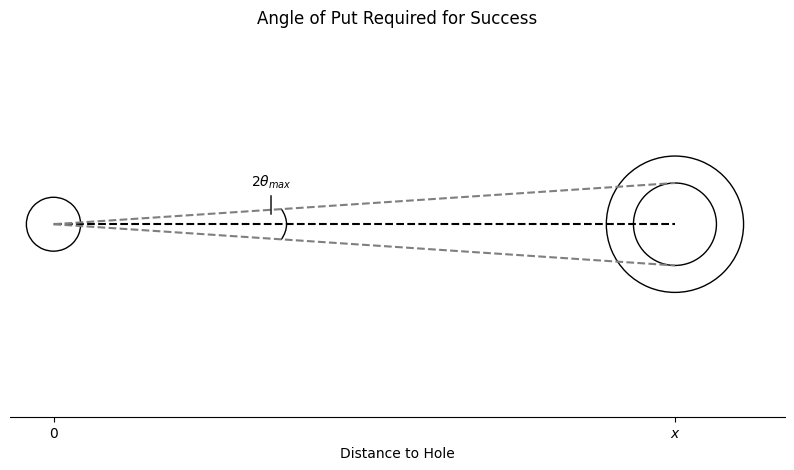

In [10]:
#| echo: false

import io

from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib.patches import Ellipse, Circle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss


df = pd.read_csv(
    io.StringIO('x n y\n2 1443 1346\n3 694 577\n4 455 337\n5 353 208\n6 272 149\n7 256 136\n8 240 111\n9 217 69\n10 200 67\n11 237 75\n12 202 52\n13 192 46\n14 174 54\n15 167 28\n16 201 27\n17 195 31\n18 191 33\n19 147 20\n20 152 24'),
    sep=' ')



from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib.patches import Ellipse, Circle, Arc


fig, ax = plt.subplots(figsize=(10, 5))



F = ss.norm.cdf
r = golf_ball_radius = 1.68 / 1  # inches
R = hole_radius = 4.25       # inches

R /= 12
r /= 12


σ = 1.5
x = 1

xlim1 = -r / 2
xlim2 = x + R / 2
s = 2. * 2 / (xlim2 - xlim1)

θ_max = np.arcsin((R - r) / x) * 180 / np.pi


ax.add_patch(
    Arc(
        (0, 0),
        .75,
        .75,
        theta1=-θ_max,
        theta2=θ_max
    )
)
ax.hlines(0, 0, x, ls='--', color='k')
ax.annotate(
    r'$2\theta_{max}$',
    (.35, np.arctan(θ_max / 180 * np.pi) * .35 / 2),
    xytext=(.35, .2),
    arrowprops={'arrowstyle': '-'},
    ha='center')

ax.add_patch(Arc((0, 0), r*2/s, r*2, color='k', lw=1))
for y in [R - r]:
    ax.add_patch(Arc((x, 0), (R - r)*2/s, (R - r)*2, color='k', lw=1))
ax.add_patch(Arc((x, 0), R*2/s, R*2, color='k', lw=1))


ax.plot([0, x], [0, R - r], color='C7', ls='--')
ax.plot([0, x], [0, -(R - r)], color='C7', ls='--')


ax.set_xlabel('Distance to Hole')
ax.set_xticks([0, x])
ax.set_xticklabels(['0', '$x$'])
ax.set_xlim([xlim1, xlim2])

ax.set_yticks([])
ax.set_ylim([-1, 1])

ax.spines.left.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

_ = ax.set_title('Angle of Put Required for Success')

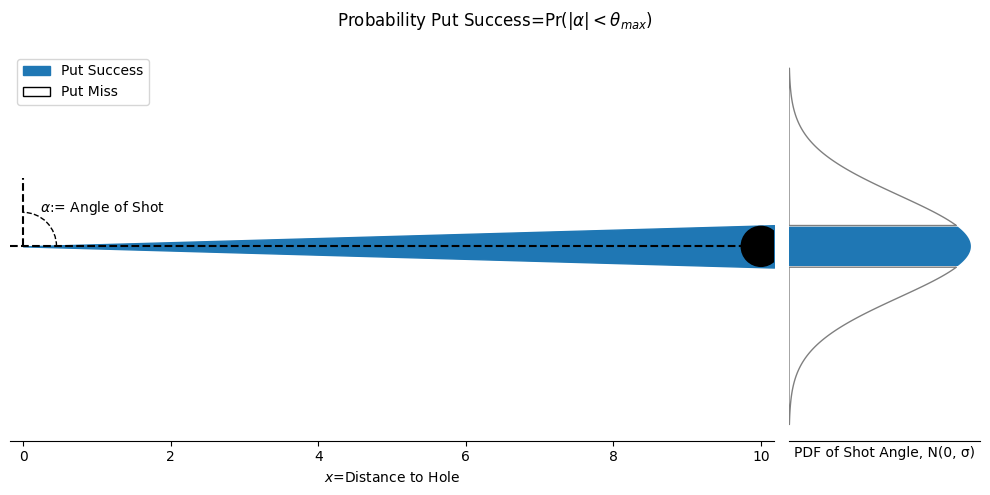

In [11]:
#| echo: false

import io

from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib.patches import Ellipse, Circle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss


df = pd.read_csv(
    io.StringIO('x n y\n2 1443 1346\n3 694 577\n4 455 337\n5 353 208\n6 272 149\n7 256 136\n8 240 111\n9 217 69\n10 200 67\n11 237 75\n12 202 52\n13 192 46\n14 174 54\n15 167 28\n16 201 27\n17 195 31\n18 191 33\n19 147 20\n20 152 24'),
    sep=' ')



from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib.patches import Ellipse, Circle, Arc


fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True, gridspec_kw={'width_ratios':[4,1]})



F = ss.norm.cdf
r = golf_ball_radius = 1.68 / 2  # inches
R = hole_radius = 4.25 / 2       # inches
X = df.x * 12                    # inches

R /= 12
r /= 12


σ = 1.5
x = 10

xlim1 = -R
xlim2 = x + R
s = 2 * 2 / (xlim2 - xlim1)

ax = axs[0]

ax.add_patch(Arc((0, 0), 5 * r/s, 5 * r, theta1=0, theta2=90, edgecolor='k', ls='--'))
ax.axhline(0, ls='--', color='k')
ax.vlines(0, 0, 5 * r, color='k', ls='--')
ax.annotate(r'$\alpha$:= Angle of Shot', (5 * r/s/4, 5 * r/2))

ax.add_patch(Ellipse((x, 0), R / s, R, color='k', lw=5))


threshold_angle = np.arcsin((R-r) / x) * 180 / np.pi
ax.fill_between(
    [0, xlim2],
    [0, np.arctan(-threshold_angle * np.pi / 180) * xlim2],
    [0, np.arctan(threshold_angle * np.pi / 180) * xlim2],
    color='C0',
    label='Put Success',
    zorder=-1
)
# for sign in [1, -1]:
#     ax.fill_between(
#         [0, xlim2],
#         [0, np.arctan(sign * threshold_angle * np.pi / 180) * xlim2],
#         [0, np.arctan(sign * 3.5 * σ * np.pi / 180) * xlim2],
#         color='w',
#         label='Put Miss' if sign == 1 else '',
#         alpha=.5,
#         edgecolor='k',
#         zorder=-1
#     )
ax.fill_between([], [], [], color='w', label='Put Miss', edgecolor='k')

ax.set_xlabel('$x$=Distance to Hole')
ax.set_xlim([xlim1, xlim2])
ax.set_ylim([-1, 1])
ax.set_yticks([])
ax.spines.left.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.legend(loc='upper left')

ax = axs[1]

prob_success = 2 * ss.norm.cdf(np.arcsin((R - r) / (x)) / (σ * np.pi / 180)) - 1
angle = np.linspace(-3.5 * σ, 3.5 * σ, num=300)
ix1, ix2 = np.argmin(np.abs(angle - (R - r))), np.argmin(np.abs(angle - (-R + r)))
probs = ss.norm(loc=0, scale=σ).pdf(angle)
angle_scaled = angle * (R - r) / threshold_angle
ax.fill_betweenx(angle_scaled, 0, probs, where=((angle > -threshold_angle) & (angle < threshold_angle)))
ax.fill_betweenx(angle_scaled, 0, probs, where=((angle < -threshold_angle) | (angle > threshold_angle)), color='w', edgecolor='k', alpha=.5)


fig.suptitle(r'Probability Put Success=Pr$\left(\vert\alpha\vert<\theta_{max}\right)$')

ax.set_xlabel('PDF of Shot Angle, N(0, σ)')
ax.set_xlim([0, None])
ax.set_xticks([])
ax.set_yticks([])
ax.spines.left.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

fig.tight_layout()

In [3]:
#| echo: false

import io

from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib.patches import Ellipse, Circle, Arc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss


F = ss.norm.cdf
x = 10
r = golf_ball_radius = 1.68 / 2  # inches
R = hole_radius = 4.25 / 2       # inches

R /= 12
r /= 12

σ = 1.5
α_min = -3.5 * σ
α_max = 3.5 * σ

xlim1 = -r / 2
xlim2 = x + R
s = 1.9 * 2 / (xlim2 - xlim1)


def show_put(α, θ_max, ax):
    # plot the cup
    ax.add_patch(Ellipse((x, 0), R*2/s, R*2, color='k', lw=1))
    
    # plot the ball
    y =  np.arctan(α / 180 * np.pi) * x
    ax.add_patch(
        Ellipse(
            (x, y),
            r*2/s,
            r*2,
            facecolor='C0' if abs(α) < θ_max else 'w',
            edgecolor='k',
            lw=1,
            zorder=10
        )
    )
    # plot the trajectory to ball
    ax.plot([0, x], [0, y], color='C7', ls='--')
    
    # plot x-axis
    ax.hlines(0, xlim1, x, color='C7', ls='--')

    # plot angle between x-axis and put
    ax.add_patch(
        Arc(
            (0, 0),
            x/s / 5,
            x / 5,
            theta1=0 if α > 0 else α,
            theta2=α if α > 0 else 0,
        )
    )
    if α > 0:
        ax.annotate(r'$\alpha$:= Angle of Shot',
                    # (x/s/5/2, y/2),
                    (x/6, np.arctan(α / 180 * np.pi) * x / 6),
                    # arrowprops={'arrowstyle': '-'},
                    ha='center',
                    rotation=α / s)
    else:
        ax.annotate(r'$\alpha$:= Angle of Shot',
                    # (x/s/5/2, y/2),
                    (x/6, 0.05),
                    # arrowprops={'arrowstyle': '-'},
                    ha='center',
                    rotation=0)

def show_pdf(α, θ_max, ax):
    prob_success = 2 * ss.norm.cdf(np.arcsin((R - r) / (x)) / (σ * np.pi / 180)) - 1
    angle = np.linspace(α_min, α, num=300)
    ix1, ix2 = np.argmin(np.abs(angle - (R - r))), np.argmin(np.abs(angle - (-R + r)))
    probs = ss.norm(loc=0, scale=σ).pdf(angle)
    for ix, kwargs in [(((angle > -θ_max) & (angle < θ_max)), dict(color='C0', edgecolor='C0', zorder=10)),
                       (((angle < -θ_max) | (angle > θ_max)), dict(color='w', edgecolor='k', alpha=.5))]:
        ax.fill_betweenx(np.arctan(angle / 180 * np.pi) * x, 0, probs, where=ix, **kwargs)


    
    
def format_plots(ax0, ax1):
    ax0.set_xlabel('Distance to Hole')
    ax0.set_xticks([0, x])
    ax0.set_xticklabels(['0', '$x$'])
    ax0.set_xlim([xlim1, xlim2])

    ax0.set_yticks([])
    ax0.set_ylim([-1, 1])
    
    ax0.fill_between([], [], color='C0', label='put success')
    ax0.fill_between([], [], color='w', edgecolor='k', label='put miss')
    ax0.legend(loc='upper left')

    ax0.spines.left.set_visible(False)
    ax0.spines.top.set_visible(False)
    ax0.spines.right.set_visible(False)
    
    ax1.set_xlabel('PDF of Shot Angle, N(0, σ)')
    ax1.set_xlim([0, None])
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.spines.left.set_visible(False)
    ax1.spines.top.set_visible(False)
    ax1.spines.right.set_visible(False)
    


@interact(α=(α_min, α_max))
def d(α=α_min):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True, gridspec_kw={'width_ratios':[4,1]})
    fig.suptitle(r'Probability Put Success=Pr$\left(\vert\alpha\vert<\theta_{max}\right)$')
    ax0, ax1 = axs

    θ_max = np.arcsin((R - r) / x) * 180 / np.pi
    show_put(α, θ_max, ax0)
    if α > α_min:
        show_pdf(α, θ_max, ax1)
    format_plots(ax0, ax1)

    fig.tight_layout()

interactive(children=(FloatSlider(value=-5.25, description='α', max=5.25, min=-5.25), Output()), _dom_classes=…

In [6]:
#| echo: false

import io

from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib.patches import Arc, Ellipse, Circle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss


F = ss.norm.cdf
x = 10
r = golf_ball_radius = 1.68 / 2  # inches
R = hole_radius = 4.25 / 2       # inches

R /= 12
r /= 12

σ = 1.5
α_min = -3.5 * σ
α_max = 3.5 * σ

xlim1 = -r / 2
xlim2 = x + R
s = 1.9 * 2 / (xlim2 - xlim1)


def show_put(α, θ_max, ax):
    # plot the cup
    ax.add_patch(Ellipse((x, 0), R*2/s, R*2, color='k', lw=1))
    
    # plot the ball
    y =  np.arctan(α / 180 * np.pi) * x
    ax.add_patch(
        Ellipse(
            (x, y),
            r*2/s,
            r*2,
            facecolor='C0' if abs(α) < θ_max else 'w',
            edgecolor='k',
            lw=1,
            zorder=10
        )
    )
    # plot the trajectory to ball
    ax.plot([0, x], [0, y], color='C7', ls='--')
    
    # plot x-axis
    ax.hlines(0, xlim1, x, color='C7', ls='--')

    # plot angle between x-axis and put
    ax.add_patch(
        Arc(
            (0, 0),
            x/s / 5,
            x / 5,
            theta1=0 if α > 0 else α,
            theta2=α if α > 0 else 0,
        )
    )
    if α > 0:
        ax.annotate(r'$\alpha$:= Angle of Shot',
                    # (x/s/5/2, y/2),
                    (x/6, max([np.arctan(α / 180 * np.pi) * x / 6, .05])),
                    # arrowprops={'arrowstyle': '-'},
                    ha='center',
                    rotation=α / s)
    else:
        ax.annotate(r'$\alpha$:= Angle of Shot',
                    # (x/s/5/2, y/2),
                    (x/6, 0.05),
                    # arrowprops={'arrowstyle': '-'},
                    ha='center',
                    rotation=0)

def show_pdf(α, θ_max, ax):
    prob_success = 2 * ss.norm.cdf(np.arcsin((R - r) / (x)) / (σ * np.pi / 180)) - 1
    angle = np.linspace(α_min, α, num=300)
    ix1, ix2 = np.argmin(np.abs(angle - (R - r))), np.argmin(np.abs(angle - (-R + r)))
    probs = ss.norm(loc=0, scale=σ).pdf(angle)
    for ix, kwargs in [(((angle > -θ_max) & (angle < θ_max)), dict(color='C0', edgecolor='C0', zorder=10)),
                       (((angle < -θ_max) | (angle > θ_max)), dict(color='w', edgecolor='k', alpha=.5))]:
        ax.fill_betweenx(np.arctan(angle / 180 * np.pi) * x, 0, probs, where=ix, **kwargs)


    
    
def format_plots(ax0, ax1):
    ax0.set_xlabel('Distance to Hole')
    ax0.set_xticks([0, x])
    ax0.set_xticklabels(['0', '$x$'])
    ax0.set_xlim([xlim1, xlim2])

    ax0.set_yticks([])
    ax0.set_ylim([-1, 1])
    
    ax0.fill_between([], [], color='C0', label='put success')
    ax0.fill_between([], [], color='w', edgecolor='k', label='put miss')
    ax0.legend(loc='upper left')

    ax0.spines.left.set_visible(False)
    ax0.spines.top.set_visible(False)
    ax0.spines.right.set_visible(False)
    
    ax1.set_xlabel('PDF of Shot Angle, N(0, σ)')
    ax1.set_xlim([0, None])
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.spines.left.set_visible(False)
    ax1.spines.top.set_visible(False)
    ax1.spines.right.set_visible(False)
    


fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True, gridspec_kw={'width_ratios':[4,1]})
fig.suptitle(r'Probability Put Success')

def d(α):
    ax0, ax1 = axs
    ax0.clear()
    ax1.clear()
    
    θ_max = np.arcsin((R - r) / x) * 180 / np.pi
    show_put(α, θ_max, ax0)
    if α > α_min:
        show_pdf(α, θ_max, ax1)
    format_plots(ax0, ax1)
    fig.tight_layout()
    
from matplotlib.animation import FuncAnimation

α_range = np.linspace(α_min, α_max, num=10).tolist()
animation = FuncAnimation(fig, d, α_range + α_range[::-1])

from IPython.display import HTML
plt.close()
HTML(animation.to_html5_video())

/Users/dantegates/virtualenvs/v3.8/lib/python3.8/site-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


# CLV

[]

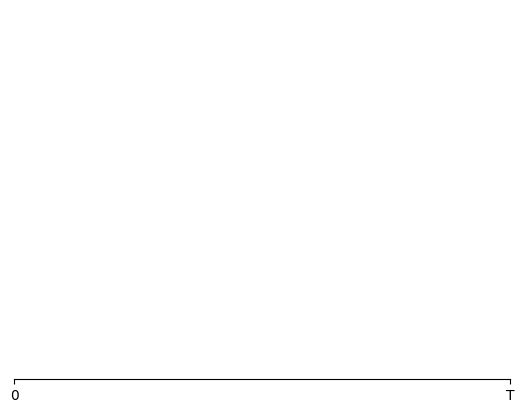

In [1]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

ax.plot()

for side in ['left', 'right', 'top']:
    getattr(ax.spines, side).set_visible(False)
ax.set_xticks([0, 100])
ax.set_xticklabels([0, 'T'])
ax.set_yticks([])

# Outline

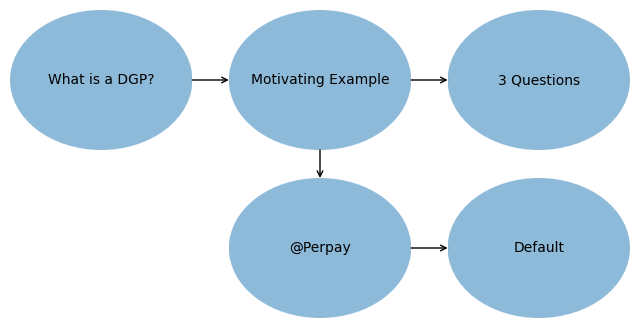

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np
import scipy.stats as ss


fig = plt.figure(figsize=(8, 4))


ax_origination = fig.add_subplot(2, 3, 1)

ax_current = fig.add_subplot(2, 3, 2)
ax_past_due = fig.add_subplot(2, 3, 5)

ax_liquidated = fig.add_subplot(2, 3, 3)
ax_default = fig.add_subplot(2, 3, 6)


axs = [
    (ax_origination, 'What is a DGP?'),
    (ax_current, 'Motivating Example'),
    (ax_past_due, '@Perpay'),
    (ax_liquidated, '3 Questions'),
    (ax_default, 'Default'),
]

connections = [
    (ax_origination, ax_current, (1, 0)),
    (ax_current, ax_past_due, (0, -1)),
    # (ax_past_due, ax_current, (0, 1)),
    (ax_current, ax_liquidated, (1, 0)),
    (ax_past_due, ax_default, (1, 0)),
    # (ax_past_due, ax_liquidated, [np.sqrt(2) / 2] * 2),
]


for ax, t in axs:
    ax.annotate(t, (0, 0), ha='center', va='center')

for ax, _ in axs:
    circle = plt.Circle((0, 0), 1., alpha=.5)
    ax.add_patch(circle)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)

for ax1, ax2, coords in connections:
    con = ConnectionPatch(
        xyA=coords, coordsA=ax1.transData,
        xyB=-1 * np.array(coords), coordsB=ax2.transData,
        arrowstyle="->")
    fig.add_artist(con)

for ax, _ in axs:
    ax.set_axis_off()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np
import scipy.stats as ss


fig = plt.figure(figsize=(8, 4))

# Deep AR

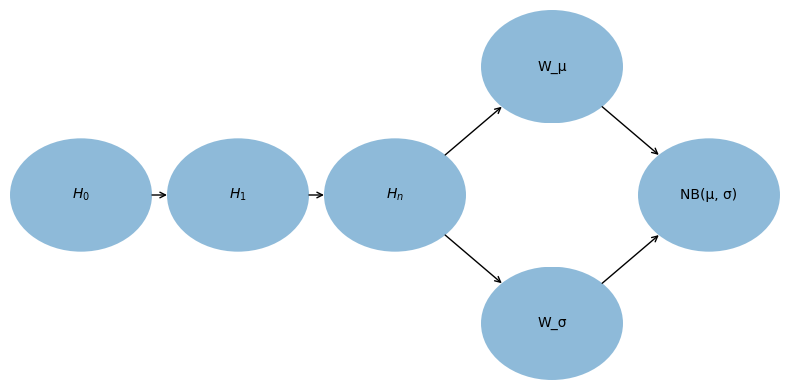

In [21]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np
import scipy.stats as ss


fig = plt.figure(figsize=(8, 4))


ax_h0 = fig.add_subplot(3, 5, 6)
ax_h1 = fig.add_subplot(3, 5, 7)
ax_hn = fig.add_subplot(3, 5, 8)

ax_wμ = fig.add_subplot(3, 5, 4)
ax_wσ = fig.add_subplot(3, 5, 14)

ax_nb = fig.add_subplot(3, 5, 10)

axs = [
    (ax_h0, '$H_{0}$'),
    (ax_h1, '$H_{1}$'),
    (ax_hn, '$H_{n}$'),
    (ax_wμ, 'W_μ'),
    (ax_wσ, 'W_σ'),
    (ax_nb, 'NB(μ, σ)'),
]

connections = [
    (ax_h0, ax_h1, (1, 0)),
    (ax_h1, ax_hn, (1, 0)),
    (ax_hn, ax_wμ, (np.sqrt(2) / 2, np.sqrt(2) / 2)),
    (ax_hn, ax_wσ, (np.sqrt(2) / 2, -np.sqrt(2) / 2)),
    (ax_wμ, ax_nb, (np.sqrt(2) / 2, -np.sqrt(2) / 2)),
    (ax_wσ, ax_nb, (np.sqrt(2) / 2, np.sqrt(2) / 2)),
]


for ax, t in axs:
    ax.annotate(t, (0, 0), ha='center', va='center')

for ax, _ in axs:
    circle = plt.Circle((0, 0), 1., alpha=.5)
    ax.add_patch(circle)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)

for ax1, ax2, coords in connections:
    con = ConnectionPatch(
        xyA=coords, coordsA=ax1.transData,
        xyB=-1 * np.array(coords), coordsB=ax2.transData,
        arrowstyle="->")
    fig.add_artist(con)

for ax, _ in axs:
    ax.set_axis_off()
    
fig.tight_layout()